# Email Pre-Processing

__Author:__ Nolan MacDonald

__Date:__ 21-NOV-2024

__Description:__ Cleaning emails and looking at the data.

## Import Modules

In [ ]:
import numpy as np
import os
import pandas as pd
import sqlite3
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Get the full path to the root directory
# os.path.dirname(os.getcwd()) is root dir - INTA6450_Enron/ folder
root_dir = os.path.dirname(os.getcwd())
print(f"Root directory: {root_dir}")
# Current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

Root directory: /Users/nmacdonald/projects/INTA6450_Enron
Current working directory: /Users/nmacdonald/projects/INTA6450_Enron/notebooks


## Load Database

In [2]:
# INTA6450_Enron/data/emails.db
path_db = f"{root_dir}/data/emails.db"

# Table name for DataFrame saved in the database
table_name = "emails"

# Connect to the database (or create it if it doesn't exist)
connection = sqlite3.connect(path_db)

# Create a cursor object to execute SQL commands
cursor = connection.cursor()

# Load the dataframe from the SQLite database
emails_df = pd.read_sql_query(f"SELECT * FROM {table_name}", connection)

# Close the connection
connection.close()

# Show email data
emails_df.head()

,text,message_id,date,from,to,subject,cc,bcc,mime-version,content-type,content-transfer-encoding,x-from,x-to,x-cc,x-bcc,folder,origin,filename,priority
0,---------------------- Forwarded by Rika Imai/...,<88180.1075863689140.JavaMail.evans@thyme>,"Tue, 8 May 2001 08:37:00 -0700 (PDT)",rika.imai@enron.com,"john.forney@enron.com, mike.carson@enron.com, ...",4 Month Rolling Forecast,,,1.0,text/plain; charset=ANSI_X3.4-1968,,Rika Imai,"John M Forney, Mike Carson, Clint Dean, Doug G...",,,\Rob_Benson_Jun2001\Notes Folders\Notes inbox,Benson-R,rbenson.nsf,normal
1,great,<4460514.1075857469666.JavaMail.evans@thyme>,"Wed, 21 Jun 2000 02:01:00 -0700 (PDT)",hunter.shively@enron.com,richard.tomaski@enron.com,Re: Jim Simpson,,,1.0,text/plain; charset=us-ascii,,Hunter S Shively,Richard Tomaski,,,\Hunter_Shively_Jun2001\Notes Folders\Sent,Shively-H,hshivel.nsf,normal
2,"oohh la la. who was your ""friend""? did you g...",<2160301.1075858147494.JavaMail.evans@thyme>,"Wed, 16 Aug 2000 03:03:00 -0700 (PDT)",matthew.lenhart@enron.com,shelliott@dttus.com,Re: Re[2]:,,,1.0,text/plain; charset=us-ascii,,Matthew Lenhart,Shirley Elliott <shelliott@dttus.com> @ ENRON,,,\Matthew_Lenhart_Jun2001\Notes Folders\Sent,Lenhart-M,mlenhar.nsf,normal
3,\nAttached are the two files with this week's ...,<22847680.1075863611080.JavaMail.evans@thyme>,"Wed, 15 Aug 2001 05:46:47 -0700 (PDT)",rika.imai@enron.com,"russell.ballato@enron.com, hicham.benjelloun@e...",FW: Nuclear Rolling Forecast,,,1.0,text/plain; charset=us-ascii,,"Imai, Rika </O=ENRON/OU=NA/CN=RECIPIENTS/CN=RI...","Ballato, Russell </O=ENRON/OU=NA/CN=RECIPIENTS...",,,"\ExMerge - Benson, Robert\Inbox\Large Messages",BENSON-R,rob benson 6-25-02.PST,normal
4,lm:\nWhat are your thoughts going forward........,<15012282.1075852957298.JavaMail.evans@thyme>,"Wed, 3 Oct 2001 00:35:05 -0700 (PDT)",jennifer.fraser@enron.com,larry.may@enron.com,hello,,,1.0,text/plain; charset=us-ascii,,"Fraser, Jennifer </O=ENRON/OU=NA/CN=RECIPIENTS...","May, Larry </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Lm...",,,\LMAY2 (Non-Privileged)\Inbox,May-L,LMAY2 (Non-Privileged).pst,normal


# Examine Data

Look at the first email in the DataFrame.

In [3]:
# Get the first email text
text = emails_df.iloc[0]["text"]

# Remove newline characters
text_newline = re.sub(r"\n", " ", text)

# Prepare the data dictionary for JSON
data = {"text": text, "text_clean": text_newline}

# Save to text.json
# file_path = f"{cwd}/text.json"
# with open(file_path, "w") as file:
#     json.dump(data, file)

# Get the text
text = data["text"]
clean = data["text_clean"]

# Print the formatted text
print(text)

---------------------- Forwarded by Rika Imai/NA/Enron on 05/08/2001 03:37 PM 
---------------------------


"Dan Salter" <dsalter@hgp-inc.com> on 05/08/2001 02:42:13 PM
Please respond to "Dan Salter" <dsalter@hgp-inc.com>
To: "Rogers Herndon" <Rogers.Herndon@enron.com>, "Rika Imai" 
<Rika.Imai@enron.com>, "Lloyd Will" <Lloyd.Will@enron.com>, "Kevin Presto" 
<Kevin.M.Presto@enron.com>, "Harry Aurora" <harora@enron.com>, "Fletch Sturm" 
<Fsturm@enron.com>, "Dana Davis" <Mark.Dana.Davis@enron.com>, "Doug 
Gilbert-Smith" <Doug.Gilbert-Smith@enron.com>
cc:  

Subject: 4 Month Rolling Forecast



Attached are the two files for this week's nuclear four month  rolling 
forecast.
?
Dan
 - 010508 update.doc
 - 010508 update.xls



# Unique Folder Count

Number of Emails in the data base that were obtained from a specific folder.

## Filter Data

In [4]:
df = emails_df.copy()

print("number of folders: ", df.shape[0])
print("number of unique folders: ", df["folder"].unique().shape[0])

unique_emails = pd.DataFrame(df["folder"].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ["folder_name", "count"]
unique_emails.head(10)

number of folders:  251734
number of unique folders:  4627


,folder_name,count
0,\Kay_Mann_June2001_3\Notes Folders\Sent,4367
1,\Jeff_Dasovich_June2001\Notes Folders\Notes inbox,3211
2,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,2492
3,\Tanya_Jones_Dec2000\Notes Folders\Sent,2486
4,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,2404
5,\Jeff_Dasovich_Dec2000\Notes Folders\Notes inbox,2310
6,\Tanya_Jones_Dec2000\Notes Folders\Notes inbox,2147
7,\Mark_Taylor _Dec_2000\Notes Folders\Notes inbox,1904
8,\Jeff_Dasovich_June2001\Notes Folders\Sent,1861
9,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,1723


## Plot Top 20 Folders

/var/folders/qp/vfqpfn_n3zd7_yyg46l4zt4c0000gn/T/ipykernel_47691/3001900976.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


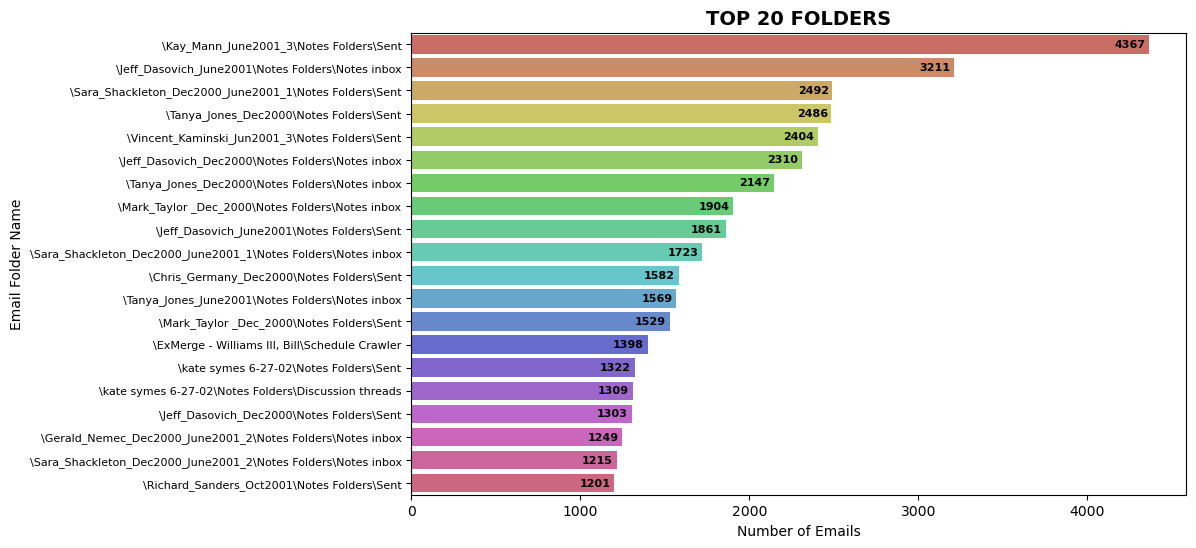

In [5]:
plt.figure(figsize=(10, 6))

# Grid
# plt.grid(zorder=1)

# Top 20 folders
data_filter = unique_emails.iloc[:20, :]

# Color palette
palette = sns.color_palette("hls", len(data_filter))

ax = sns.barplot(
    x="count", y="folder_name", data=data_filter, 
    palette=palette, zorder=2
)

plt.title(f"TOP {len(data_filter)} FOLDERS", fontsize=14, fontweight="bold")
plt.xlabel("Number of Emails")
plt.ylabel("Email Folder Name")

# Adjust font size of y-axis tick labels
ax.tick_params(axis="y", labelsize=8)

# Adding text labels
for container in ax.containers:
    ax.bar_label(container, fmt = "%.0f", label_type="edge", padding=-25, 
                 fontsize = 8, fontweight="bold", zorder = 3)

# Save the plot before showing it
plt.savefig(f"{root_dir}/data/figures/top_20_folders_email_count.png", format="png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

# Emails Sent

## Filter Data

- Cleaned up majority of email addresses that contained apostrophes, `<', '>', and duplicate periods in the name.

In [ ]:
df = emails_df.copy()

# Fix broken emails
# Remove apostrophes from 'from' and 'x-from' columns
# df["from"] = df["from"].str.replace("'", "", regex=False)
# # Remove " <" before the email
# df['from'] = df['from'].str.replace(r'\s<', '', regex=True) 
# # Remove ">" after the email
# df['from'] = df['from'].str.replace(r'>', '', regex=True)
# # Replace double periods with a single period
# df['from'] = df['from'].str.replace(r'\.\.', '.', regex=True)



def clean_email_address(email):
    """Clean and fix broken email addresses."""
    if not isinstance(email, str):
        return email  # Return the value unchanged if it's not a string
    
    # Remove apostrophes
    email = re.sub(r"'", "", email)
    # Remove " <" before the email
    email = re.sub(r'\s<', '', email)
    # Remove ">" after the email
    email = re.sub(r'>', '', email)
    # Replace double periods with a single period
    email = re.sub(r'\.\.', '.', email)
    
    return email

# Apply the function to the DataFrame
df['from'] = df['from'].apply(clean_email_address)


# TODO: Write to db

# Show email data
df.head()

,text,message_id,date,from,to,subject,cc,bcc,mime-version,content-type,content-transfer-encoding,x-from,x-to,x-cc,x-bcc,folder,origin,filename,priority
0,---------------------- Forwarded by Rika Imai/...,<88180.1075863689140.JavaMail.evans@thyme>,"Tue, 8 May 2001 08:37:00 -0700 (PDT)",rika.imai@enron.com,"john.forney@enron.com, mike.carson@enron.com, ...",4 Month Rolling Forecast,,,1.0,text/plain; charset=ANSI_X3.4-1968,,Rika Imai,"John M Forney, Mike Carson, Clint Dean, Doug G...",,,\Rob_Benson_Jun2001\Notes Folders\Notes inbox,Benson-R,rbenson.nsf,normal
1,great,<4460514.1075857469666.JavaMail.evans@thyme>,"Wed, 21 Jun 2000 02:01:00 -0700 (PDT)",hunter.shively@enron.com,richard.tomaski@enron.com,Re: Jim Simpson,,,1.0,text/plain; charset=us-ascii,,Hunter S Shively,Richard Tomaski,,,\Hunter_Shively_Jun2001\Notes Folders\Sent,Shively-H,hshivel.nsf,normal
2,"oohh la la. who was your ""friend""? did you g...",<2160301.1075858147494.JavaMail.evans@thyme>,"Wed, 16 Aug 2000 03:03:00 -0700 (PDT)",matthew.lenhart@enron.com,shelliott@dttus.com,Re: Re[2]:,,,1.0,text/plain; charset=us-ascii,,Matthew Lenhart,Shirley Elliott <shelliott@dttus.com> @ ENRON,,,\Matthew_Lenhart_Jun2001\Notes Folders\Sent,Lenhart-M,mlenhar.nsf,normal
3,\nAttached are the two files with this week's ...,<22847680.1075863611080.JavaMail.evans@thyme>,"Wed, 15 Aug 2001 05:46:47 -0700 (PDT)",rika.imai@enron.com,"russell.ballato@enron.com, hicham.benjelloun@e...",FW: Nuclear Rolling Forecast,,,1.0,text/plain; charset=us-ascii,,"Imai, Rika </O=ENRON/OU=NA/CN=RECIPIENTS/CN=RI...","Ballato, Russell </O=ENRON/OU=NA/CN=RECIPIENTS...",,,"\ExMerge - Benson, Robert\Inbox\Large Messages",BENSON-R,rob benson 6-25-02.PST,normal
4,lm:\nWhat are your thoughts going forward........,<15012282.1075852957298.JavaMail.evans@thyme>,"Wed, 3 Oct 2001 00:35:05 -0700 (PDT)",jennifer.fraser@enron.com,larry.may@enron.com,hello,,,1.0,text/plain; charset=us-ascii,,"Fraser, Jennifer </O=ENRON/OU=NA/CN=RECIPIENTS...","May, Larry </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Lm...",,,\LMAY2 (Non-Privileged)\Inbox,May-L,LMAY2 (Non-Privileged).pst,normal


In [ ]:
df["text"].iloc[0]

In [32]:
def clean_text(text):
    """Clean the email text by removing unwanted characters and formatting."""
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove any non-alphanumeric characters except spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the clean_text function to the 'text' column
clean = df['text'].apply(clean_text)

# Display the cleaned text of the first email
# df['clean_text'].iloc[0]
clean[0]

' Forwarded by Rika ImaiNAEnron on 05082001 0337 PM  Dan Salter dsalterhgpinccom on 05082001 024213 PM Please respond to Dan Salter dsalterhgpinccom To Rogers Herndon RogersHerndonenroncom Rika Imai RikaImaienroncom Lloyd Will LloydWillenroncom Kevin Presto KevinMPrestoenroncom Harry Aurora haroraenroncom Fletch Sturm Fsturmenroncom Dana Davis MarkDanaDavisenroncom Doug GilbertSmith DougGilbertSmithenroncom cc Subject 4 Month Rolling Forecast Attached are the two files for this weeks nuclear four month rolling forecast  Dan  010508 updatedoc  010508 updatexls '

In [35]:
clean[4]

'lm What are your thoughts going forward Also what are you seeing for the winter in TZ6 Tetco M3 and AGT thanks jf'

## Invalid Email Addresses

- The invalid email address were identified that do not contain `first.last@email`
- 5 invalid email addresses that sent 5 total emails is not too bad for 250K total emails

In [23]:
# Define an email validation regex pattern
email_pattern = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"

# Check which email addresses do not match the pattern
invalid_emails = df_senders[~df_senders["Sender Address"].str.match(email_pattern)]

if invalid_emails.empty:
    print("All email addresses are valid.")
else:
    print(f"Invalid email addresses found: {len(invalid_emails)}")

# Reset the index to be sequential from 0 to N
invalid_emails.reset_index(drop=True, inplace=True)

invalid_emails.head(21)

Invalid email addresses found: 5


,Sender Address,Counts
0,pepperformance.,1
1,u@d.h,1
2,"<""linda"".@enron@enron.com",1
3,"<""d@piassick"".@enron@enron.com",1
4,jt9@mops.opa-row,1


## Most Sent Emails

- Filter the data to determine the emails with the most sent emails in the database

In [22]:
# Create a DataFrame to count unique pairs of 'from' and 'x-from'
df_senders = df.groupby(["from"]).size().reset_index(name="Counts")

# Sort the DataFrame by 'Counts' in descending order
df_senders = df_senders.sort_values(by="Counts", ascending=False)

# Reset the index to be sequential from 0 to N
df_senders.reset_index(drop=True, inplace=True)

# Rename the columns in df_senders
df_senders = df_senders.rename(columns={"from": "Sender Address"})

# Display the resulting DataFrame
df_senders.head(20)

,Sender Address,Counts
0,jeff.dasovich@enron.com,5498
1,kay.mann@enron.com,4868
2,sara.shackleton@enron.com,4443
3,tana.jones@enron.com,4152
4,vince.kaminski@enron.com,3935
5,pete.davis@enron.com,3921
6,chris.germany@enron.com,3620
7,matthew.lenhart@enron.com,2762
8,debra.perlingiere@enron.com,2439
9,gerald.nemec@enron.com,2230


## Search Email Data

In [17]:
# Search for rows in the 'Address' column that contain legal
df_senders_filtered = df_senders[
    df_senders["Sender Address"].str.contains(r"piassick", regex=True, na=False)
]
df_senders_filtered.reset_index(drop=True, inplace=True)
# Display the filtered rows
df_senders_filtered.head(20)

,Sender Address,Name,Counts
0,"<""d@piassick"".@enron@enron.com","""d@piassick"" <d@piassick>@ENRON",1


## Email Meta Data

In [43]:
# Calculate total number of emails and total newline count
total_emails = len(emails_df)
total_newlines = emails_df["text"].str.count("\n").sum()

# Count email addresses in each email body and calculate total email addresses
emails_df["email_count"] = emails_df["text"].str.count(r"\S+@\S+")
total_email_addresses = emails_df["email_count"].sum()

# Count URLs in each email body
emails_df["url_count"] = emails_df["text"].str.count(r"http\S+|www\S+")
total_urls = emails_df["url_count"].sum()

# Count special characters and punctuation in each email body
emails_df["special_char_count"] = emails_df["text"].str.count(r"[^a-zA-Z\s]")
total_special_chars = emails_df["special_char_count"].sum()

# Count words in each email body
emails_df["word_count"] = emails_df["text"].str.findall(r"\b\w+\b").str.len()
total_words = emails_df["word_count"].sum()

# Count sentences in each email body (heuristic based on sentence-ending punctuation)
emails_df["sentence_count"] = emails_df["text"].str.count(r"[.!?]")
total_sentences = emails_df["sentence_count"].sum()

# Create the new DataFrame with newline counts
newline_counts_df = emails_df[["text"]].copy()

# Add counts into df
newline_counts_df["New Lines \\n"] = emails_df["text"].str.count("\n")
newline_counts_df["Email Count"] = emails_df["email_count"]
newline_counts_df["URL Count"] = emails_df["url_count"]
newline_counts_df["Special Char Count"] = emails_df["special_char_count"]
newline_counts_df["Word Count"] = emails_df["word_count"]
newline_counts_df["Sentence Count"] = emails_df["sentence_count"]

# Create a new row for the totals and insert it at the top of the DataFrame
totals_row = pd.DataFrame(
    {
        "text": ["Total Emails"],
        "New Lines \\n": [total_newlines],
        "Email Count": [total_email_addresses],
        "URL Count": [total_urls],
        "Special Char Count": [total_special_chars],
        "Word Count": [total_words],
        "Sentence Count": [total_sentences],
    }
)
newline_counts_df = pd.concat([totals_row, newline_counts_df], ignore_index=True)

# Add total emails count as the first row
# newline_counts_df.at[0, "text"] = f"Total Emails: {total_emails}"

newline_counts_df.head()  # Display the first few rows to verify

,text,New Lines \n,Email Count,URL Count,Special Char Count,Word Count,Sentence Count
0,Total Emails,10411219,924798,231192,50562873,73075774,6494550
1,---------------------- Forwarded by Rika Imai/...,23,10,0,186,114,22
2,great,0,0,0,0,1,0
3,"oohh la la. who was your ""friend""? did you g...",1,0,0,8,29,6
4,\nAttached are the two files with this week's ...,3,0,0,2,13,1


# Format Date

Update data to correct values and strip time zone. Then reformat to adhere to `datetime` format.

In [42]:
# Identify non-matching rows
non_matching = emails_df[~emails_df['date'].str.match(r'.*, \d{1,2} \w{3} \d{4} \d{2}:\d{2}:\d{2} [+-]\d{4}')]
print(non_matching['date'].head())

# Extract the desired date format
emails_df['stripped_date'] = emails_df['date'].apply(
    lambda x: re.search(r'.{3}, \d{1,2} \w{3} \d{4} \d{2}:\d{2}:\d{2}', x).group(0) if re.search(r'.{3}, \d{1,2} \w{3} \d{4} \d{2}:\d{2}:\d{2}', x) else None
)

# Identify rows where extraction failed
invalid_rows = emails_df[emails_df['stripped_date'].isna()]
print(f"Invalid rows:\n{invalid_rows}")

# Parse the stripped dates
emails_df['datetime'] = emails_df['stripped_date'].apply(
    lambda x: datetime.strptime(x, '%a, %d %b %Y %H:%M:%S')
)

print(emails_df[['date', 'stripped_date', 'datetime']].head())


Series([], Name: date, dtype: object)
Invalid rows:
Empty DataFrame
Columns: [text, message_id, date, from, to, subject, cc, bcc, mime-version, content-type, content-transfer-encoding, x-from, x-to, x-cc, x-bcc, folder, origin, filename, priority, stripped_date, datetime]
Index: []

[0 rows x 21 columns]
                                    date              stripped_date  \
0   Tue, 8 May 2001 08:37:00 -0700 (PDT)   Tue, 8 May 2001 08:37:00   
1  Wed, 21 Jun 2000 02:01:00 -0700 (PDT)  Wed, 21 Jun 2000 02:01:00   
2  Wed, 16 Aug 2000 03:03:00 -0700 (PDT)  Wed, 16 Aug 2000 03:03:00   
3  Wed, 15 Aug 2001 05:46:47 -0700 (PDT)  Wed, 15 Aug 2001 05:46:47   
4   Wed, 3 Oct 2001 00:35:05 -0700 (PDT)   Wed, 3 Oct 2001 00:35:05   

              datetime  
0  2001-05-08 08:37:00  
1  2000-06-21 02:01:00  
2  2000-08-16 03:03:00  
3  2001-08-15 05:46:47  
4  2001-10-03 00:35:05  
